**Homeworks – Statistical learning, 2021/22. semester I.**

*Week 4*

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression as LM

In [2]:
np.random.seed(1)

# Exercise a)

## Problem

![img/ex_a.png](img/ex_a.png)

In [3]:
n = 100
x1, x2 = np.random.rand(n), np.random.rand(n)
y = 5.1 + 3.7*x1 + 0.314*x2

## Solution

# Exercise b)

## Problem

![img/ex_b.png](img/ex_b.png)

## Solution

In [4]:
# set number of iterations
k = 1000
# empty parameters
beta0, beta1, beta2 = np.zeros(k), np.zeros(k), np.zeros(k)
# initialize starting value
beta1[0] = 5.0
fitted = LM().fit(y = y - beta2[0], X=x1.reshape(-1, 1))
beta0[0], beta1[0] = fitted.intercept_, fitted.coef_

# iteration
for i in range(1, k):
    beta2[i] = LM().fit(y = y - beta1[i-1]*x1, X=x2.reshape(-1, 1)).coef_
    fitted = LM().fit(y = y - beta2[i-1], X=x1.reshape(-1, 1))
    beta0[i], beta1[i] = fitted.intercept_, fitted.coef_

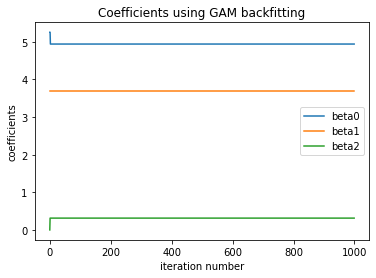

In [5]:
plt.title('Coefficients using GAM backfitting')
plt.ylabel('coefficients')
plt.xlabel('iteration number')
plt.plot(range(k), beta0, label='beta0')
plt.plot(range(k), beta1, label='beta1')
plt.plot(range(k), beta2, label='beta2')
plt.legend()
plt.show()

# Exercise c)

## Problem

![img/ex_c.png](img/ex_c.png)

## Solution

In [6]:
model = smf.ols('y ~ x1+x2', data=pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.014e+30
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:25:38   Log-Likelihood:                 3144.2
No. Observations:                 100   AIC:                            -6282.
Df Residuals:                      97   BIC:                            -6275.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1000   1.35e-15   3.77e+15      0.0

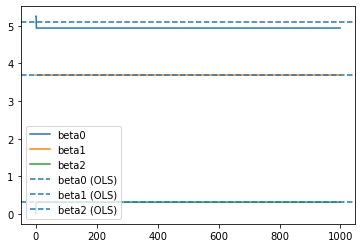

In [7]:
plt.plot(range(k), beta0, label='beta0')
plt.plot(range(k), beta1, label='beta1')
plt.plot(range(k), beta2, label='beta2')

plt.axhline(model.params[0], linestyle='--', label='beta0 (OLS)')
plt.axhline(model.params[1], linestyle='--', label='beta1 (OLS)')
plt.axhline(model.params[2], linestyle='--', label='beta2 (OLS)')

plt.legend()
plt.show()

# Exercise d)

## Problem

![img/ex_d.png](img/ex_d.png)

## Solution

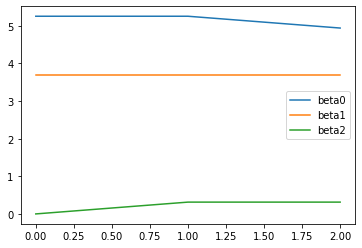

In [8]:
k = 3
plt.plot(range(k), beta0[:k], label='beta0')
plt.plot(range(k), beta1[:k], label='beta1')
plt.plot(range(k), beta2[:k], label='beta2')
plt.legend()
plt.show()

A couple of iterations were sufficient to obtain a "good" approximation of the multiple regression coefficient estimates.